In [2]:
import numpy as np
import sympy as smp
from sympy import Matrix

import scipy as sp

import qiskit

Basics of Kets

In [3]:
ket0 = np.array([1, 0]).reshape(-1, 1)
ket1 = np.array([0, 1]).reshape(-1, 1)

ket0, ket1

(array([[1],
        [0]]),
 array([[0],
        [1]]))

Basic demonstration of matricies as operations and X (not gate) affecting a state vector

In [4]:
X = np.array([[0, 1], [1, 0]])

H = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)]])

XH = X @ H

state = np.array([0, 1]).reshape(-1, 1)

X, state, X @ state

(array([[0, 1],
        [1, 0]]),
 array([[0],
        [1]]),
 array([[1],
        [0]]))

Qiskit *Statevector* class

$u = \frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle$

$v = \frac{1 + 2i}{3} |0\rangle+-\frac{2}{3} |1\rangle$

$w = \frac{1}{3} |0\rangle+\frac{2}{3} |1\rangle$


In [5]:
from qiskit.quantum_info import Statevector 
from numpy import sqrt

root2 = sqrt(2)

u = Statevector([1 / root2, 1 / root2])

v = Statevector([(1 + 2j) / 3, -2/3])

w = Statevector([1/3, 2/3])

validation check method for statevectors

In [6]:
u.is_valid()

True

Measurements with statevectors

In [7]:
display(v.draw('latex'))

outcome, state = v.measure()

print(f"Measured: {outcome}\nPost-measurement state: ")
display(state.draw('latex'))

<IPython.core.display.Latex object>

Measured: 0
Post-measurement state: 


<IPython.core.display.Latex object>

Either $\frac{1 + 2i}{\sqrt{5}}$ or $-1$

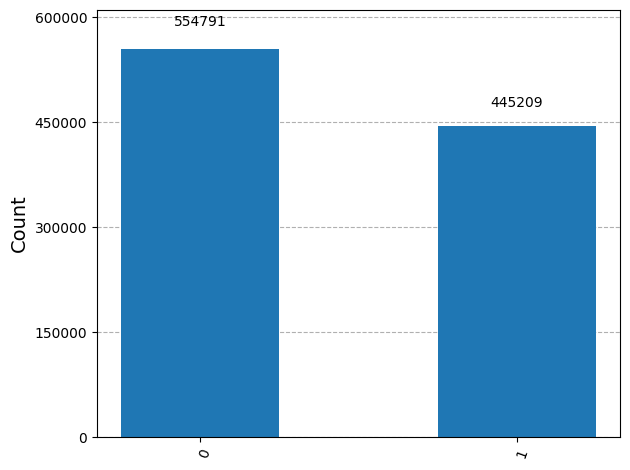

In [8]:
from qiskit.visualization import plot_histogram

stats = v.sample_counts(1_000_000)

plot_histogram(stats)

Unitary matrices as operators

In [ ]:
from qiskit.quantum_info import Operator

# Pauli Group
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1j], [1j, 0]])
Z = Operator([[1, 0], [0, -1]])

# Hadamard Gate
H = Operator([[1/root2, 1/root2], [1/root2, -1/root2]])

# Phase Gates
P = lambda theta: Operator([[1, 0], [0, np.exp(1j * theta)]])

# S Gate = P( pi/2 )
S = P(np.pi / 2)

# T Gate = P( pi / 4 )
T = P(np.pi / 4)

Y.draw('latex')

<IPython.core.display.Latex object>

Evolve method

In [31]:
v = Statevector([1, 0])

display(v.draw('latex'))
display(v.evolve(X).draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>